# House Price Prediction using advanced regression techniques

**Data**
    Data can be downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    
    With 79 explanatory variables describing (almost) every aspect of residential homes we are going to bulid a model that can predict the final price of each home. Befor building the model we need to take some steps including data cleansing and feature engineering to find the features that effectively contribute to the accuracy of the model, variables that are are most informative about target.
     
**Data Preperation**

    1) Detecting and imputing missing data
    2) Exploring skewness and outliers in features
    3) Colinearity detection and removing correlated features using corr, VIF
    4) Treating the skewed features
    5) Feature Selection using Wrapper methods and filter methods
    6) Data Normalization using power transform and other techniques like log
    7) Anova test for comparing mean of the different samples
    8) Outlier removal
        a. OneClassSVM
        b. IsolationForest
        c. Local Outlier Factor
        d. Minimum Covariance Determinant
    
**Building models**

    1) Model Selection
        - Machine Learning Models
            a. Linear Regression
            b. Decision Tree
            c. Random Forest
            d. GradiantBoosing
            e. SVM
            f. KNearest Neighbors
            g. Lasso
            h. Ridge
            i. ExteraTreeRegressor
            j. Adaboost Regressor
            k. Elasticnet
            
            Evaluation:
                1.K_fold Cross Validation
                    - R2
                    - MAE
                    - RMSE
                    - MSE
   
        - Deep Learning Models
            a. Tensorflow
                - keras
            b. Pytorch


In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, chi2, f_regression

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import seaborn as sns
from scipy.stats import norm

from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
import scipy
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_validate
from sklearn.svm import OneClassSVM
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


**Data Preperation**

In [2]:
train_df=pd.read_csv("D://Dataset//House-Prices-Advanced-Regression-Techniques-master//train.csv")
test_df=pd.read_csv("D://Dataset//House-Prices-Advanced-Regression-Techniques-master//test.csv")

In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Drop Id columns from both test and train set
test_df.drop(["Id"], axis=1, inplace=True)
train_df.drop(["Id"], axis=1, inplace=True)

In [6]:
print("Number of Features: " , test_df.columns.nunique())

Number of Features:  79


In [7]:
# Presenting different attributes of the features

def feature_description(df):
    d_types=df.dtypes
    skewness=df.skew()
    kurt=df.kurt()
    count=df.count()
    n_unique=df.apply(lambda x: x.nunique())
    miss_value=df.isnull().sum()
    miss_value_per=100*miss_value/len(df)
    Cor_with_SalePrice=train_df.corr()["SalePrice"]
    
    fea_desc=pd.concat([d_types, skewness, kurt, count, n_unique,
                       miss_value, miss_value_per, Cor_with_SalePrice],axis=1)
    names=['d_types', 'skewness', 'kurt', 'count', 'n_unique',
                       'miss_value', 'miss_value_per','Cor_with_SalePrice']
    fea_desc.columns=names
    fea_desc=fea_desc.replace(np.nan, 0)
    print("Number of different data types: ")
    print(fea_desc.d_types.value_counts())
    
    return fea_desc
    
    
    
df_desc=feature_description(train_df) 
df_desc  
    

Number of different data types: 
object     43
int64      34
float64     3
Name: d_types, dtype: int64


,d_types,skewness,kurt,count,n_unique,miss_value,miss_value_per,Cor_with_SalePrice
MSSubClass,int64,1.407657,1.580188,1460,15,0,0.000000,-0.084284
MSZoning,object,0.000000,0.000000,1460,5,0,0.000000,0.000000
LotFrontage,float64,2.163569,17.452867,1201,110,259,17.739726,0.351799
LotArea,int64,12.207688,203.243271,1460,1073,0,0.000000,0.263843
Street,object,0.000000,0.000000,1460,2,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
MoSold,int64,0.212053,-0.404109,1460,12,0,0.000000,0.046432
YrSold,int64,0.096269,-1.190601,1460,5,0,0.000000,-0.028923
SaleType,object,0.000000,0.000000,1460,9,0,0.000000,0.000000
SaleCondition,object,0.000000,0.000000,1460,6,0,0.000000,0.000000


In [8]:
# Sorting features based on their correlation with SalePrice
sort_correlation=pd.DataFrame(((train_df.corr()["SalePrice"])))
sort_correlation.sort_values(by='SalePrice', ascending=False)[:10]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


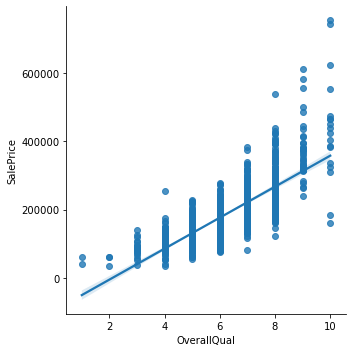

In [9]:
sns.lmplot("OverallQual", "SalePrice", data=train_df)

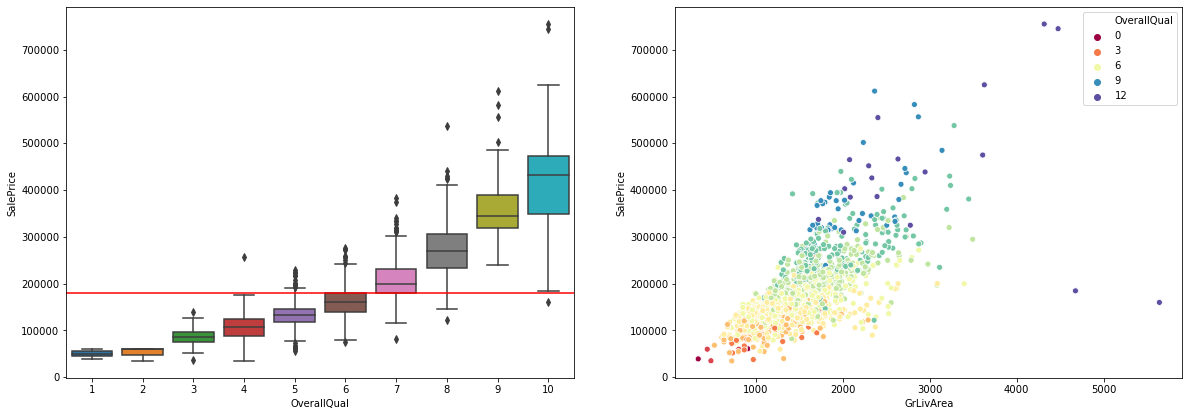

In [10]:
fig=plt.figure(figsize=(20,15))

fig1=fig.add_subplot(221)
sns.boxplot(x='OverallQual', y="SalePrice", data=train_df)
plt.axhline(train_df.SalePrice.mean(), color='r')

fig2=fig.add_subplot(222)
sns.scatterplot("GrLivArea", "SalePrice", data=train_df, hue="OverallQual",  palette= 'Spectral')

**Pairplot**

Pair plot of some features to find out the correlation between features, to depict outliers and distribution of features.

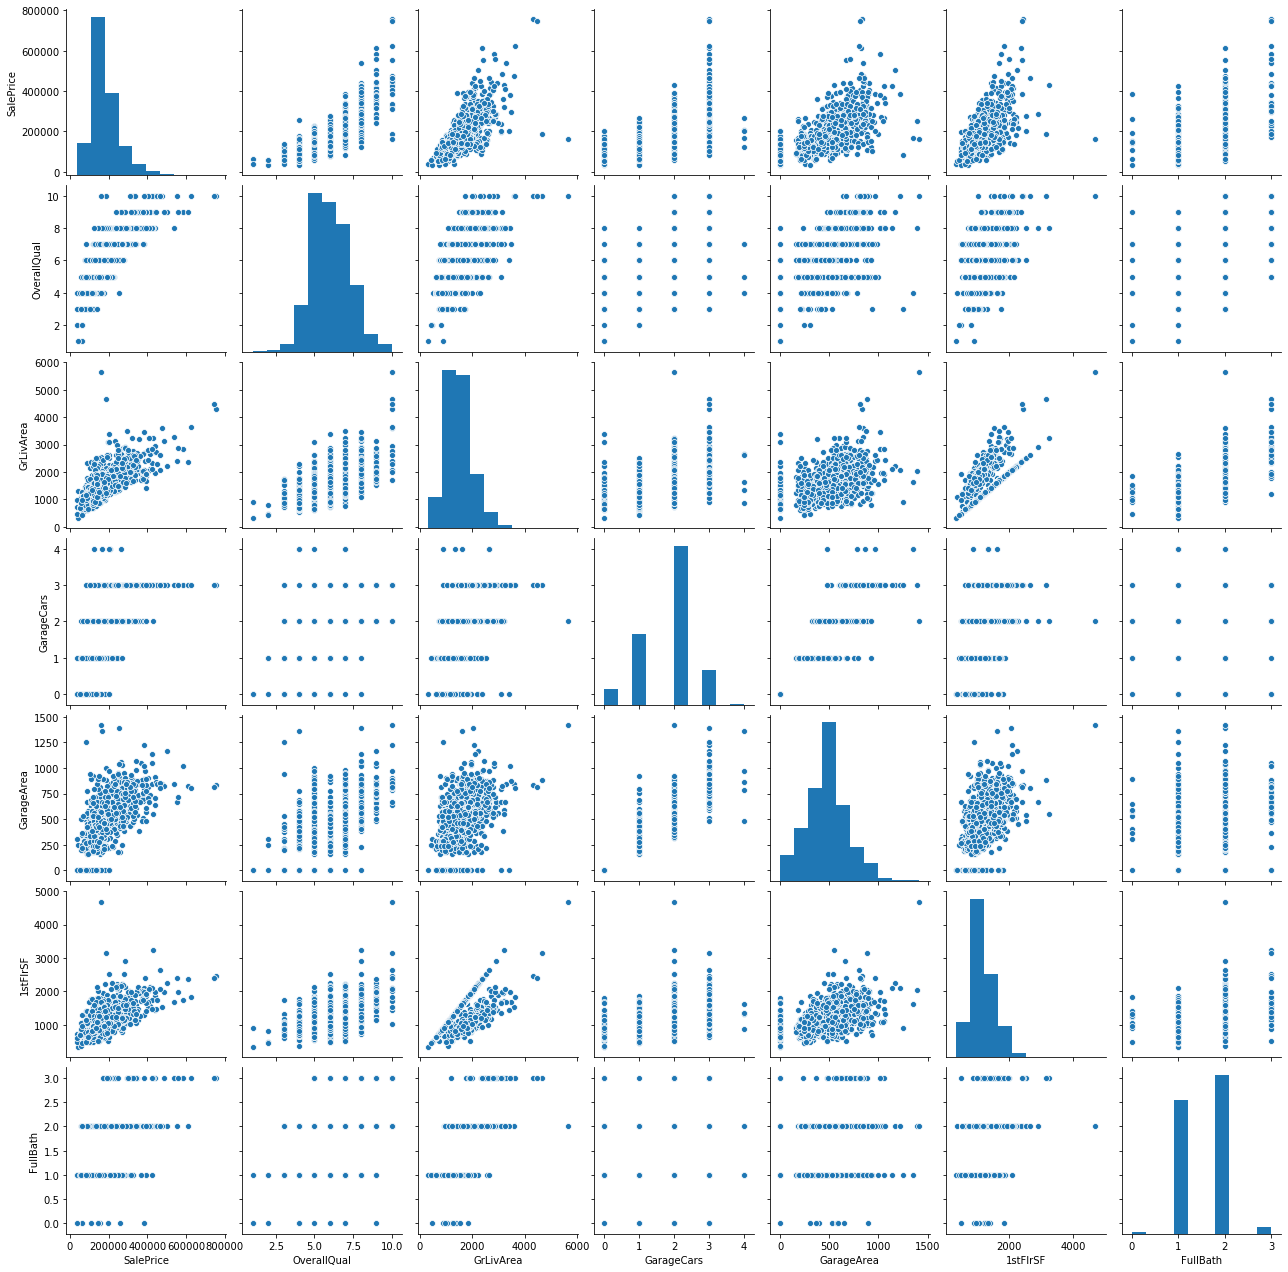

In [11]:
sns.pairplot(train_df[["SalePrice", "OverallQual", "GrLivArea","GarageCars", "GarageArea","1stFlrSF", "FullBath"]])

In [12]:
# Sort feature based on their skewness
df_desc.sort_values(by=["skewness"], ascending=False).iloc[:15, [1]]


,skewness
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


These features must be transformed to achieve a normal distribution

In [13]:
# Variables with missing values more than 40%
df_desc.sort_values(by='miss_value_per', ascending=False).iloc[:5, [6]]

,miss_value_per
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274


Features with many missing values must be dropped and the reset must be filled

In [14]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [15]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# ANOVA test to see if there is significant difference between mean of different groups of LotShape
df_groupby=train_df.groupby(['LotShape'])
test_result, p_value=scipy.stats.f_oneway(df_groupby.get_group('Reg')['SalePrice'],
              df_groupby.get_group('IR1')['SalePrice'],
              df_groupby.get_group('IR2')['SalePrice'],
              df_groupby.get_group('IR3')['SalePrice'])

if p_value<0.05:
    print('P_value: ', p_value)
    print("Significant Results, Reject the Null Hypothesis==> means of the groups are different")
else:
    print("Not Significant Results, Fail to Reject the NullHypothesis==> means of the groups are the same")

P_value:  6.447523852011766e-25
Significant Results, Reject the Null Hypothesis==> means of the groups are different


The same test can be done to investigate other categorical features.

In [17]:
# Function to plot correlation of features with SalePrice, outliers and distribution.
def plot_fea(train_df, fea_, continuous):
    fig=plt.figure(figsize=(20,10))
    fig1=fig.add_subplot(231)
    sns.scatterplot(x=train_df[fea_], y=train_df.SalePrice, hue=train_df.YearBuilt)
    fig1.set_title(fea_+' '+ 'and SalePrice' + ' Correlation')

    fig2=fig.add_subplot(232)
    sns.regplot(x=train_df[fea_], y=train_df.SalePrice)
    fig2.set_title(' linear model fit to '+ fea_+' and SalePrice')
    
    
    fig3=fig.add_subplot(233)
    plt.boxplot(train_df[fea_])
    fig3.set_title(fea_+" distribution and outlier depiction")
    
    if continuous:
        fig=plt.figure(figsize=(28,7))
        fig1=fig.add_subplot(121)
        sns.distplot(train_df[fea_])
        fig1.set_title(fea_+' ' + 'distribution')
        
    else:
        fig=plt.figure(figsize=(28,7))
        fig1=fig.add_subplot(121)
        quantity=train_df[fea_].value_counts()
        paths=train_df[fea_].value_counts().keys()
        plt.title(fea_)
        plt.ylabel(" Quantities")
        plt.xlabel("Categories")
        plt.bar(paths, quantity)
        
        
        fig2=fig.add_subplot(122)
        sns.boxplot(x=fea_, y="SalePrice", data=train_df)
        plt.axhline(train_df.SalePrice.mean(), color='r')
        plt.title("differen categories of " +fea_ + " and SalePrice")

        
    print("Correlation amount with ", pd.DataFrame(((train_df.corr().loc["SalePrice"]))).loc[fea_])
    print("Amount of Outlier: ", train_df[fea_].kurt())
    print("Amount of Skewness: ", train_df[fea_].skew())
    

**Correlation between YearBuilt and SalePrice**

It is crystal clear that the date of construction of a house will have a impact on the price of a house. The point here is that the date of the construction of garage may be different from the house and it can make difference in the price as well.

A. Skewness

skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

B. Kurtosis

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


Correlation amount with  SalePrice    0.522897
Name: YearBuilt, dtype: float64
Amount of Outlier:  -0.43955194159361977
Amount of Skewness:  -0.613461172488183


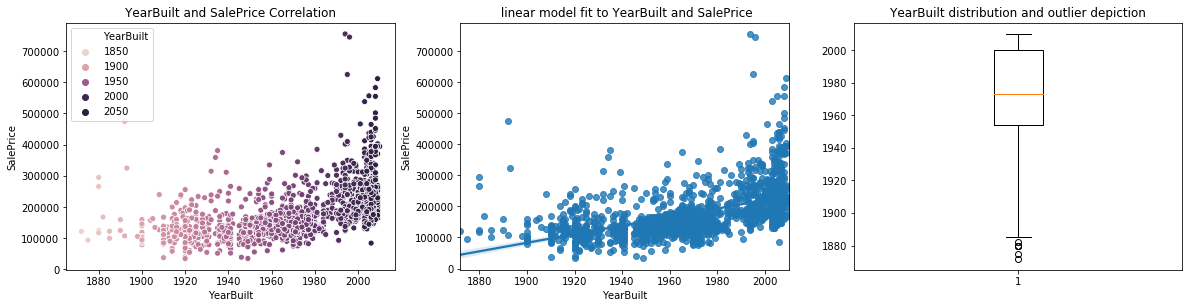

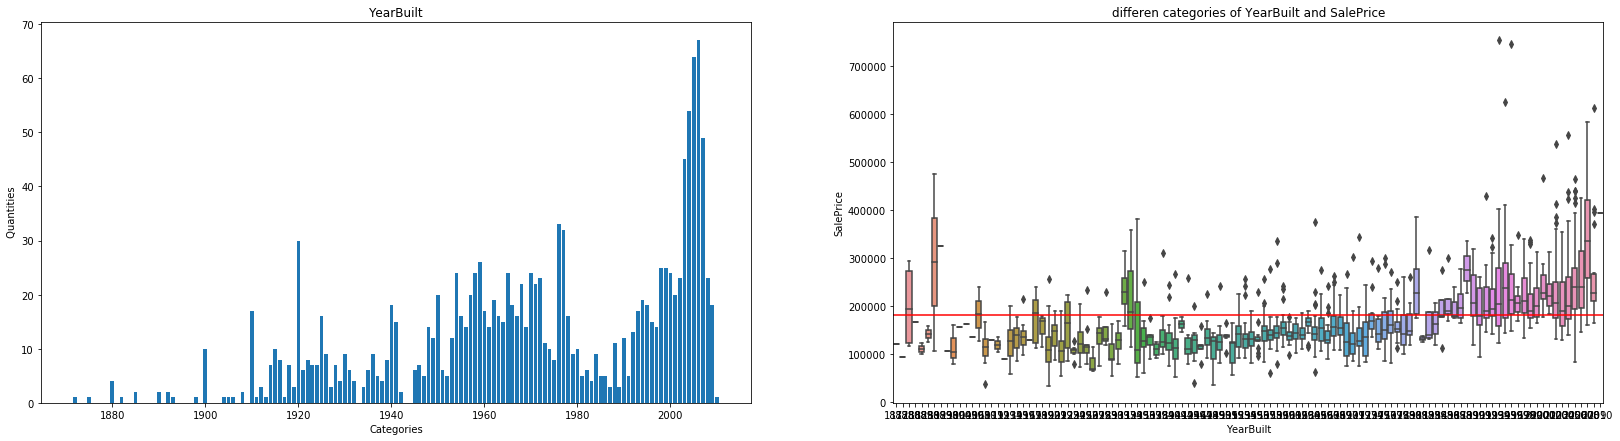

In [18]:
plot_fea(train_df, 'YearBuilt', continuous=False)

**Correlation between Basement and Sale Price**

We could say that having a large basement is an advantage for a house, let's see how is the correlation between these features.
We can see that there are outliers in our data, therefore we need to manage them latter.

Correlation amount with  SalePrice    0.613581
Name: TotalBsmtSF, dtype: float64
Amount of Outlier:  13.250483281984796
Amount of Skewness:  1.5242545490627664


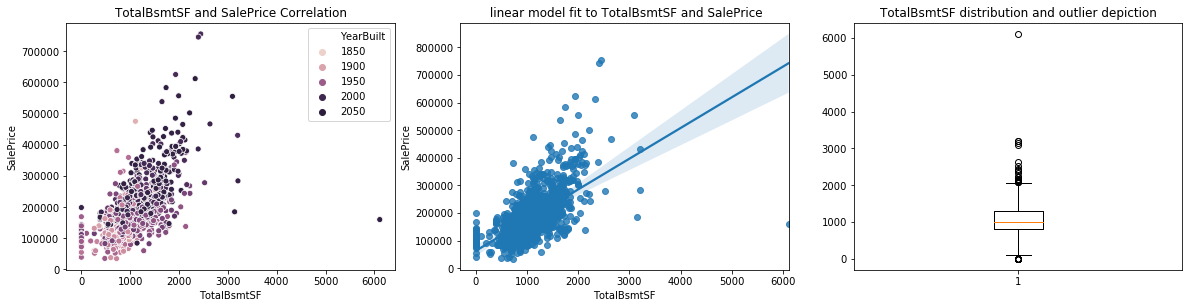

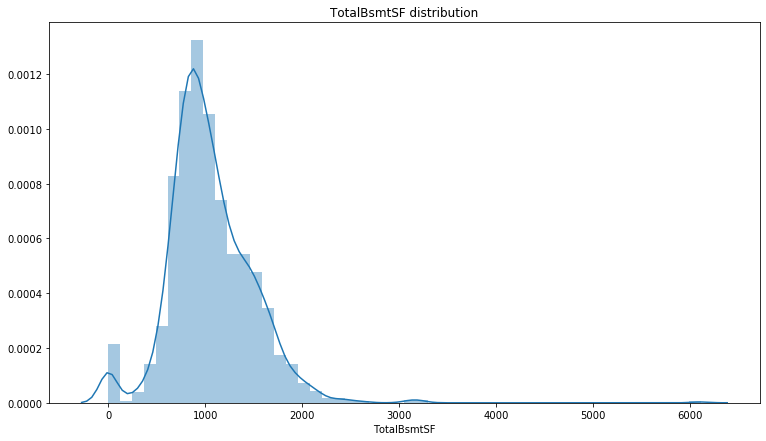

In [19]:
plot_fea(train_df, 'TotalBsmtSF', continuous=True)

**Correlation between porch and Sale price**


From the below figures we can see that there is low correlation between different kind of porch and Sale price.
We also have outliers in our data and heavey long tail in the right.

Correlation amount with  SalePrice    0.315856
Name: OpenPorchSF, dtype: float64
Amount of Outlier:  8.490335805910506
Amount of Skewness:  2.3643417403694404


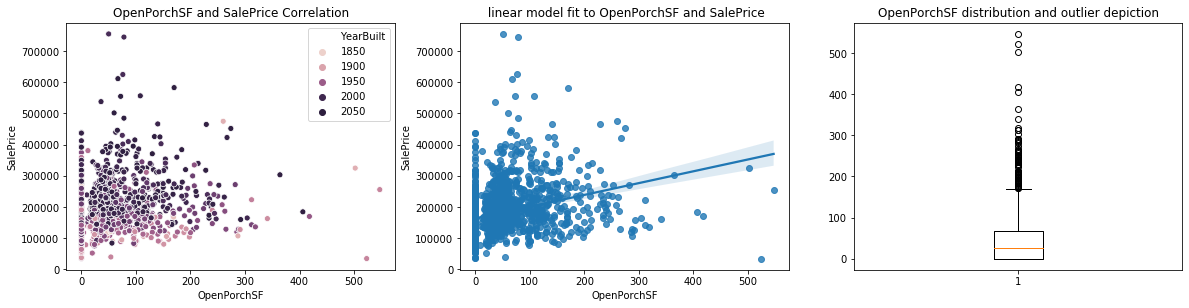

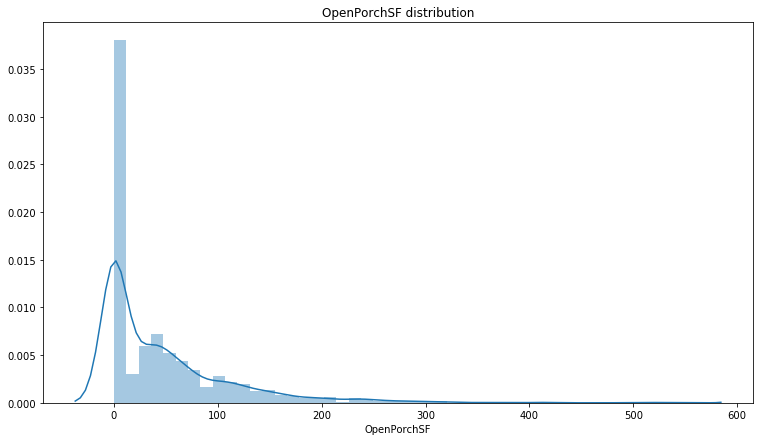

In [20]:
plot_fea(train_df, 'OpenPorchSF', continuous=True)

Correlation amount with  SalePrice   -0.128578
Name: EnclosedPorch, dtype: float64
Amount of Outlier:  10.430765944030428
Amount of Skewness:  3.08987190371177


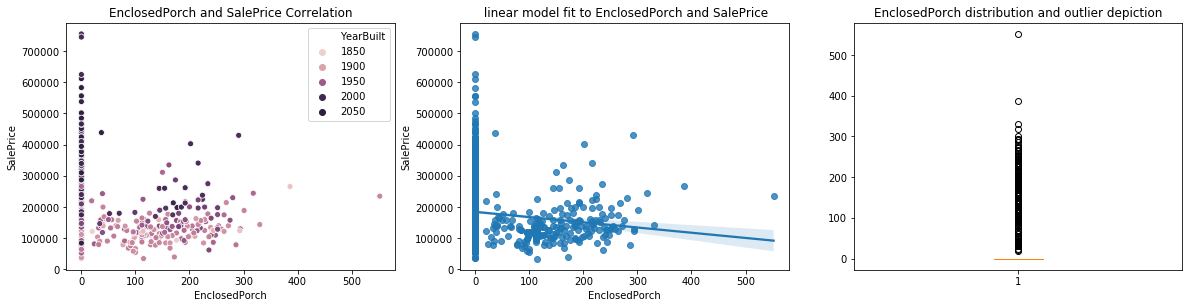

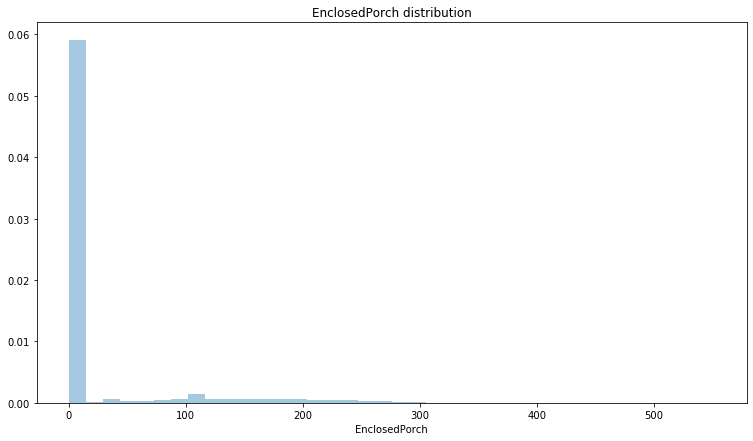

In [21]:
plot_fea(train_df, 'EnclosedPorch', continuous=True)

**Investigating the impact of the slop on the sale price**

Here we can see that we have three different categories of slop, Gentle slope, Moderate Slope and Severe Slop.

In [22]:
train_df.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

Correlation amount with  SalePrice    0.051152
Name: LandSlope, dtype: float64
Amount of Outlier:  24.597605471455974
Amount of Skewness:  4.813682424489448


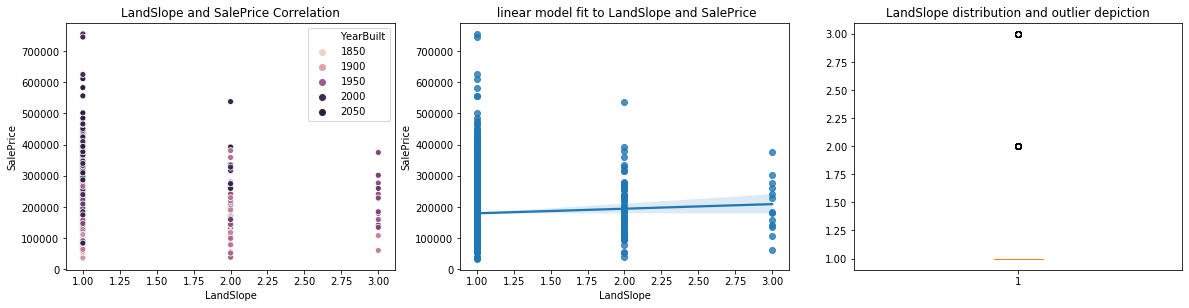

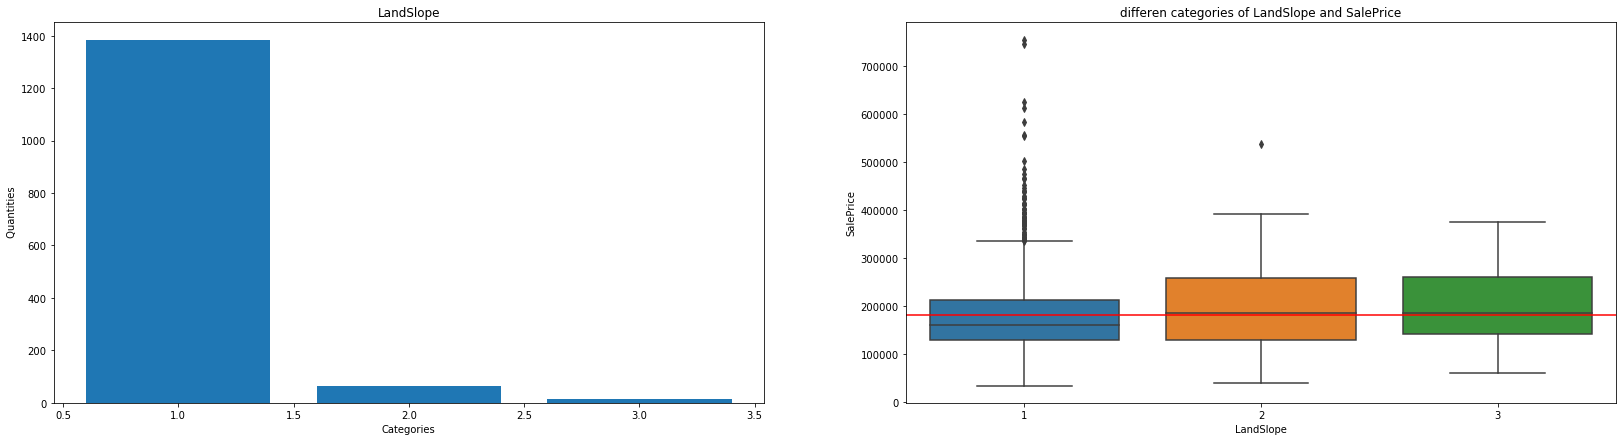

In [23]:
temp_df=train_df[['SalePrice', 'LandSlope', 'YearBuilt']]
temp_df.LandSlope=temp_df.LandSlope.map({'Gtl': 1, 'Mod': 2, 'Sev': 3})    
plot_fea(temp_df, "LandSlope", continuous=False)

**Checking the Correlation between first floor feature and SalePrice**

We can see there is a considerable correlation between these two features.
There are also outliers in our data and positive skewness.

Correlation amount with  SalePrice    0.605852
Name: 1stFlrSF, dtype: float64
Amount of Outlier:  5.74584148244079
Amount of Skewness:  1.3767566220336365


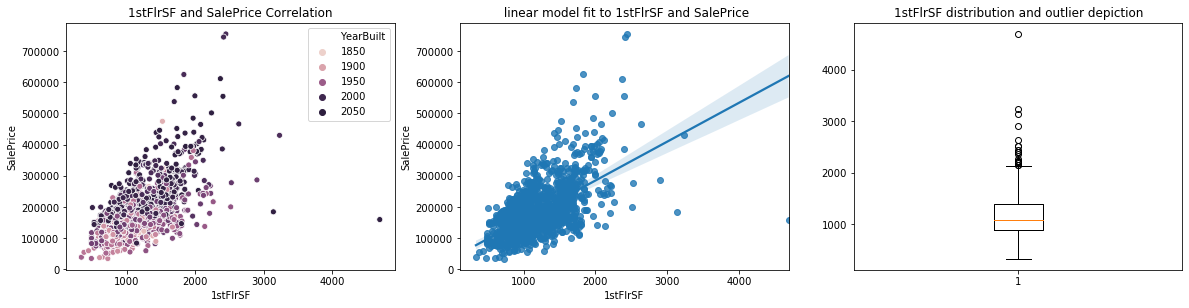

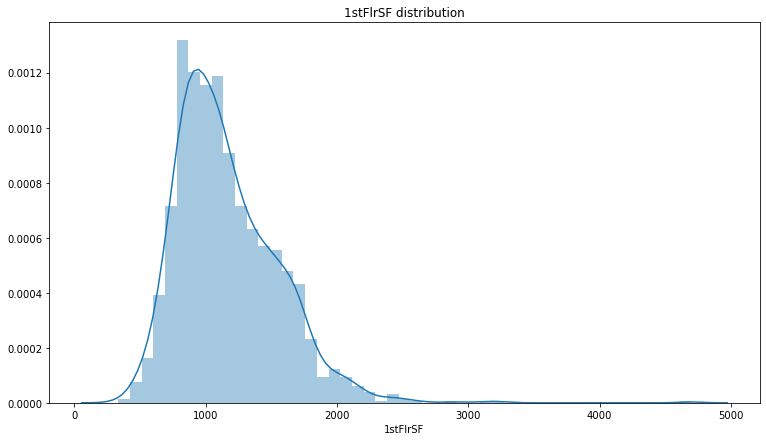

In [24]:
plot_fea(train_df, "1stFlrSF",continuous=True)

**Correlation between FullBath and SalePrice**

From figures we can see that there is good correlation between this feature and SalePrice.
We do not have outliers in this feature and small amount of skewness can be seen.

Correlation amount with  SalePrice    0.560664
Name: FullBath, dtype: float64
Amount of Outlier:  -0.8570428212743262
Amount of Skewness:  0.036561558402727165


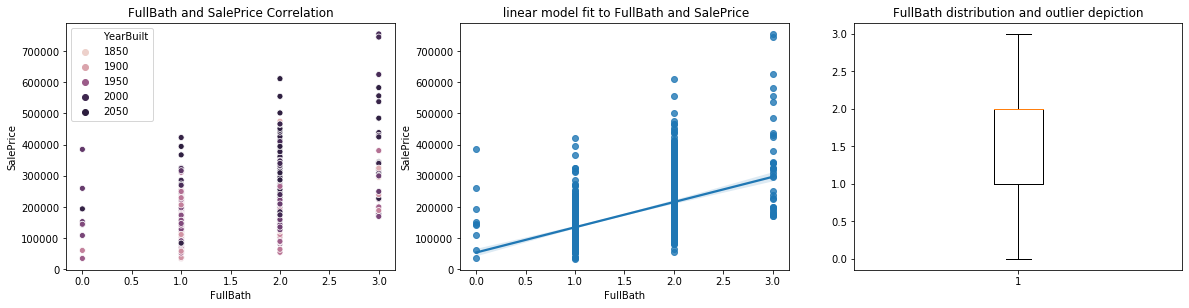

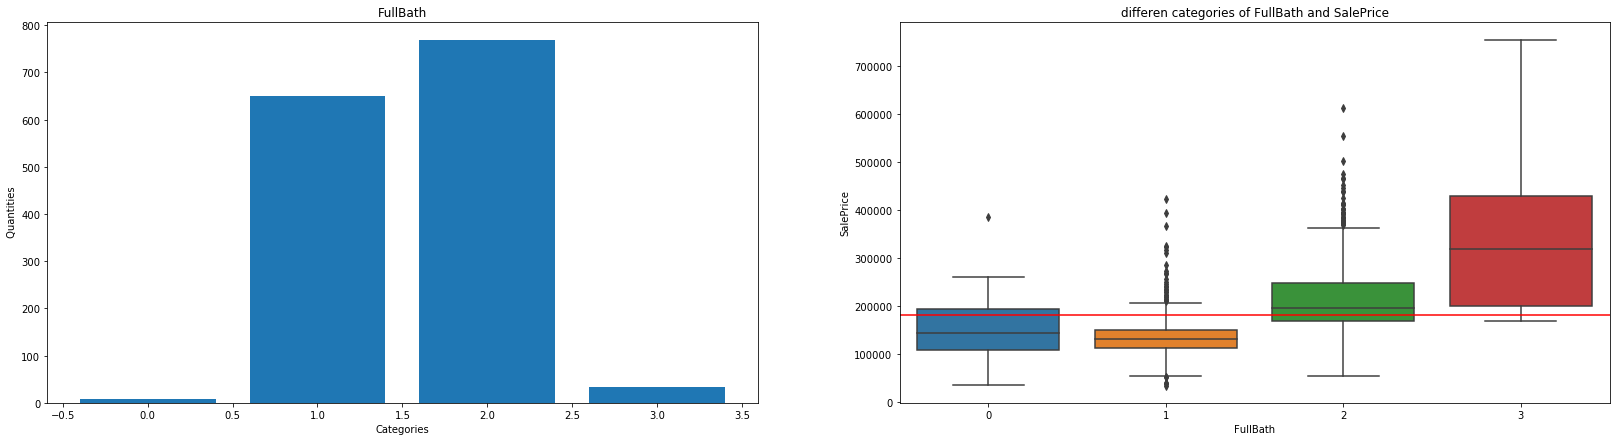

In [25]:
plot_fea(train_df,"FullBath",continuous=False)

**Correlation between total rooms above ground and the sale price**

there is a high correlation between total rooms above ground and the SalePrice.
We have few outliers and also skewness in this feature.

Correlation amount with  SalePrice    0.533723
Name: TotRmsAbvGrd, dtype: float64
Amount of Outlier:  0.8807615657189474
Amount of Skewness:  0.6763408364355531


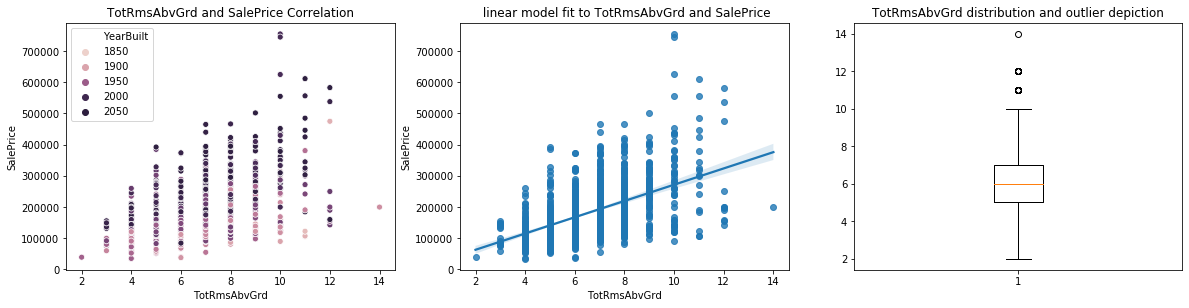

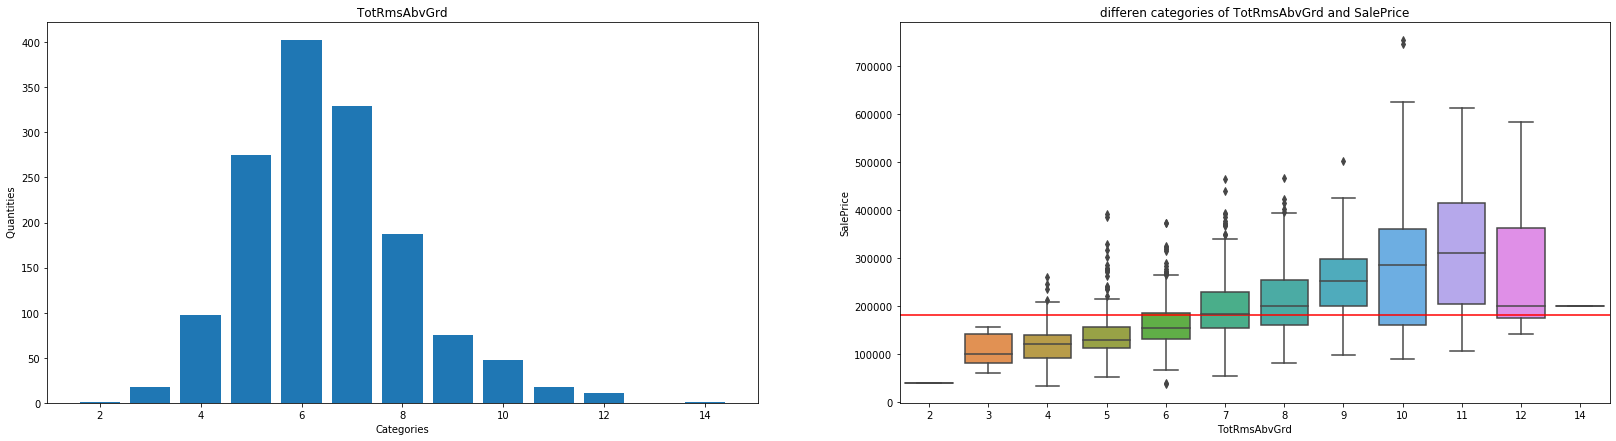

In [26]:
plot_fea(train_df,"TotRmsAbvGrd",continuous=False)

**Correlation between Fireplaces and the sale price**

We have Few outliers and positive skewness.

Correlation amount with  SalePrice    0.466929
Name: Fireplaces, dtype: float64
Amount of Outlier:  -0.21723720752814657
Amount of Skewness:  0.6495651830548841


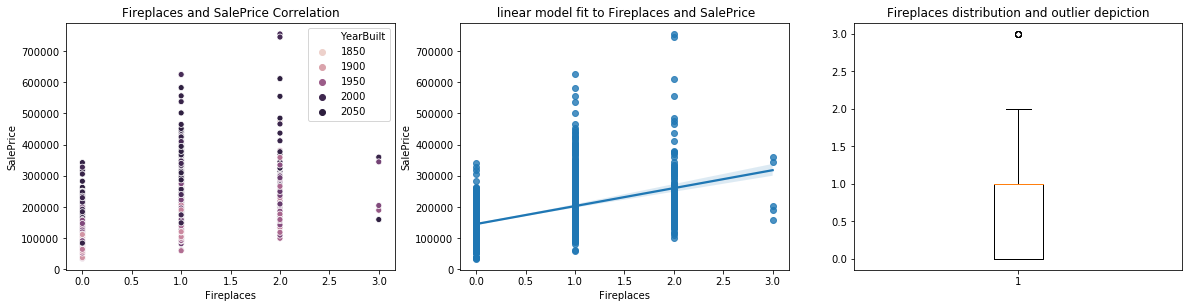

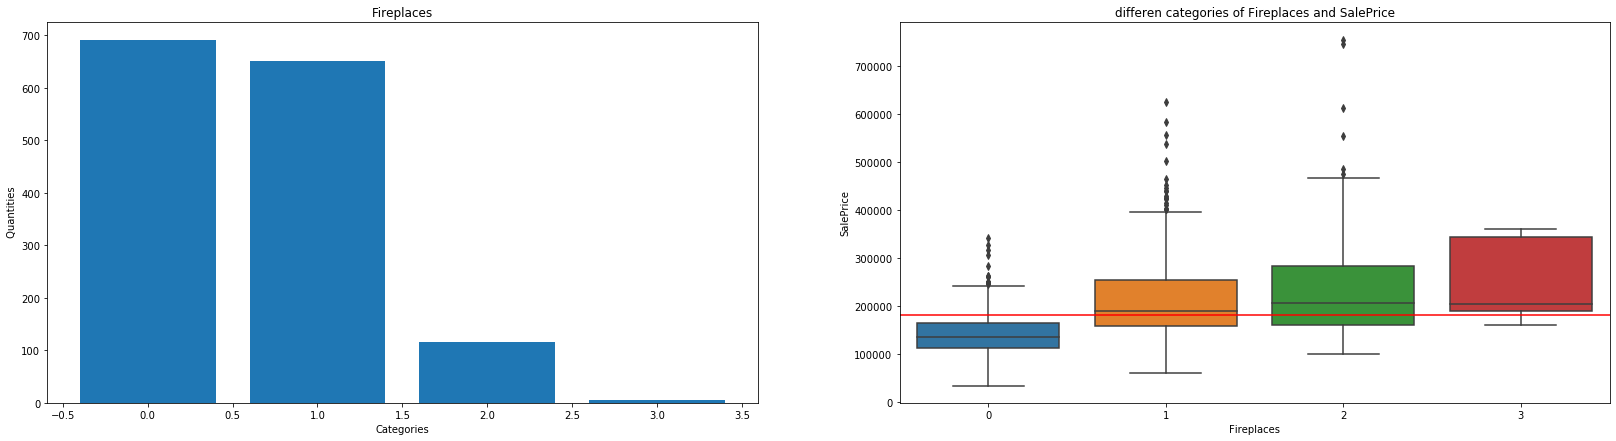

In [27]:
plot_fea(train_df,"Fireplaces",continuous=False)

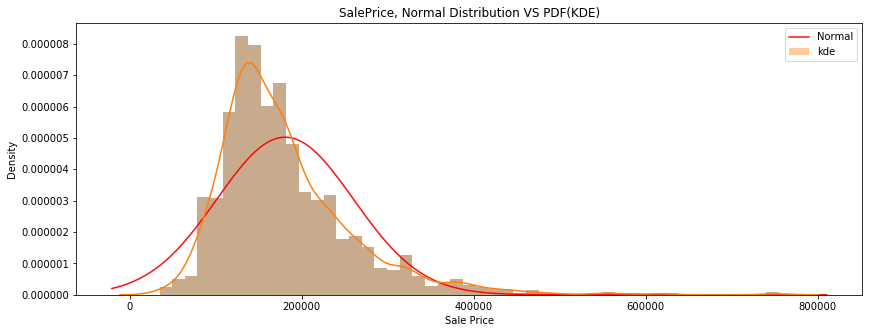

In [28]:
# Depicting how transformation can change the shape of the distribution of data
fig=plt.figure(figsize=(31,5))
fig1=fig.add_subplot(121)
sns.distplot(train_df.SalePrice, fit=norm, kde=False, kde_kws={"label": "KDE"}, fit_kws={"color": "r", "alpha": .95, "label": "Normal"})
plt.legend()
sns.distplot(train_df.SalePrice, kde=True, label="kde")
plt.legend()
plt.title("SalePrice, Normal Distribution VS PDF(KDE)")
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()


**Data Cleansing**
    1. Dealing with missing values
    2. Dealing with Categorical variables
    3. Normalizing the data
    4. Standardizing the data
    5. Dealing with multicolinearity

In [88]:
# Fisrt of all we need to concat the testset and trainingset
frames=[train_df, test_df]
df=pd.concat(frames)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [89]:
# To have more meaning full data with Date features, we convert them from the date to age of the building 
df["YearBuilt"]= df["YearBuilt"].apply(lambda x: 0 if x==0 else (2020 - x))
df["YearRemodAdd"]= df["YearRemodAdd"].apply(lambda x: 0 if x==0 else (2020 - x))
df["GarageYrBlt"]= df["GarageYrBlt"].apply(lambda x: 0 if x==0 else (2020 - x))
df["YrSold"]= df["YrSold"].apply(lambda x: 0 if x==0 else (2020 - x))

In [92]:
SalePrice=df['SalePrice'].copy()

In [93]:
# Removing features with missing values more than 40 %
def remove_missing_values(df):
    for i in (df.columns):
        
        if df[i].isna().sum()/df.shape[0]>0.5:
            df.drop([i], axis=1, inplace=True)

    return df

df=remove_missing_values(df)
df.SalePrice=SalePrice
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,12,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,13,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,12,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,14,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,12,WD,Normal,250000.0


Now we have data that has variables with missing values less than 40%

In [94]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

**Missing values Imputation**
1. dtypes=='O' ==> with most frequent
2. dtypes== 'int' or 'float' ==> with mean

In [95]:
def impute_missing_values(df):
    
    for i in (df.columns):
        if df[i].dtypes=='O':
            df[i]=df[i].fillna(df[i].value_counts().index[0])
            
        else:
            df[i]=df[i].fillna(df[i].mean())
            
    return df
df=impute_missing_values(df)    

In [96]:
# Detecting ordinal variables
for i in (df.select_dtypes('O')):
    print(i, df[i].unique(), df[i].nunique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 5
Street ['Pave' 'Grvl'] 2
LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 4
LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 4
Utilities ['AllPub' 'NoSeWa'] 2
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 5
LandSlope ['Gtl' 'Mod' 'Sev'] 3
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 25
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 9
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 8
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 5
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 8
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 6
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 8
Exterior1st ['VinylSd' 'Metal

We need to deal with ordinal variables diffrently than other categorical variable, To keep the semantical information of the variables

In [97]:
df["LandSlope"]= df["LandSlope"].map({'Gtl':3, 'Mod':2, 'Sev':1})

df["PavedDrive"]= df["PavedDrive"].map({'Y':3, 'P':2, 'N':1})

df["LotShape"]=df["LotShape"].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})

df["BsmtExposure"]=df["BsmtExposure"].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3})

df["ExterQual"]=df["ExterQual"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["GarageCond"]=df["GarageCond"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["GarageQual"]=df["GarageQual"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["HeatingQC"]=df["HeatingQC"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["BsmtCond"]=df["BsmtCond"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["BsmtQual"]=df["BsmtQual"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["ExterCond"]=df["ExterCond"].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df['KitchenQual']=df['KitchenQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df['FireplaceQu']=df['FireplaceQu'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5})

df["BsmtFinType1"] =df["BsmtFinType1"].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2})

df["BsmtFinType2"] =df["BsmtFinType2"].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2})

df["CentralAir"]=df["CentralAir"].map({'Y':1, 'N':0})

df["GarageFinish"]= df["GarageFinish"].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})

df["Functional"]=df["Functional"].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1})

df["Street"]=df["Street"].map({'Pave':1, 'Grvl':0})


In [98]:
for i in (df.select_dtypes('O')):
    print(i, df[i].unique(), df[i].nunique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 5
LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 4
Utilities ['AllPub' 'NoSeWa'] 2
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 5
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 25
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 9
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 8
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 5
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 8
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 6
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 8
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 

Now we have only categorical variables.

**Correlation between HeatingQC and SalePrice**

We can see considerable correlation between HeatingQC and SalePrice.

Correlation amount with  SalePrice    0.302882
Name: HeatingQC, dtype: float64
Amount of Outlier:  -1.1478338024411459
Amount of Skewness:  -0.5501923723459468


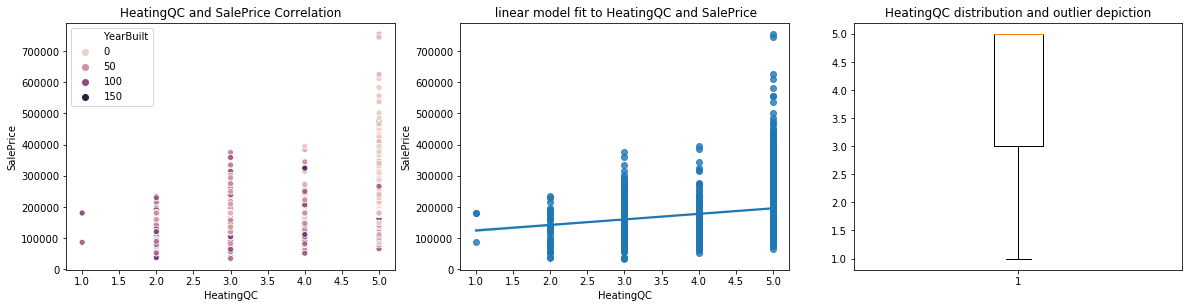

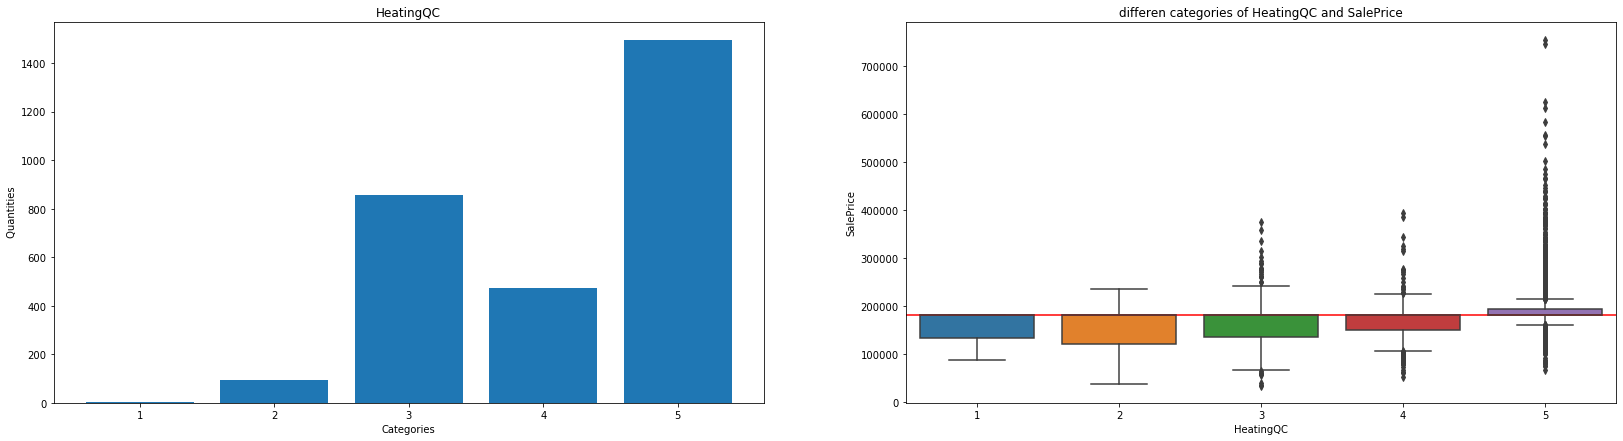

In [99]:
plot_fea(df,"HeatingQC",continuous=False)

**Correlation between HeatingQC and SalePrice**

We cannot see high correlation here, but heavy outliers and some skewness on the left side.

Correlation amount with  SalePrice    0.1512
Name: PavedDrive, dtype: float64
Amount of Outlier:  7.125856426285165
Amount of Skewness:  -2.9806160741194834


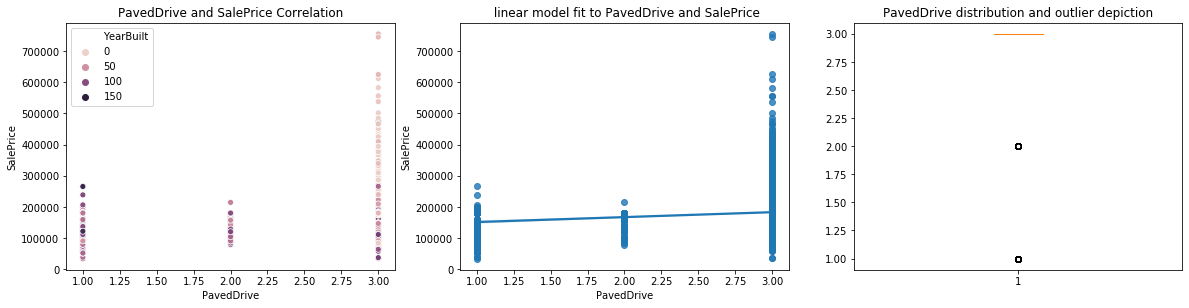

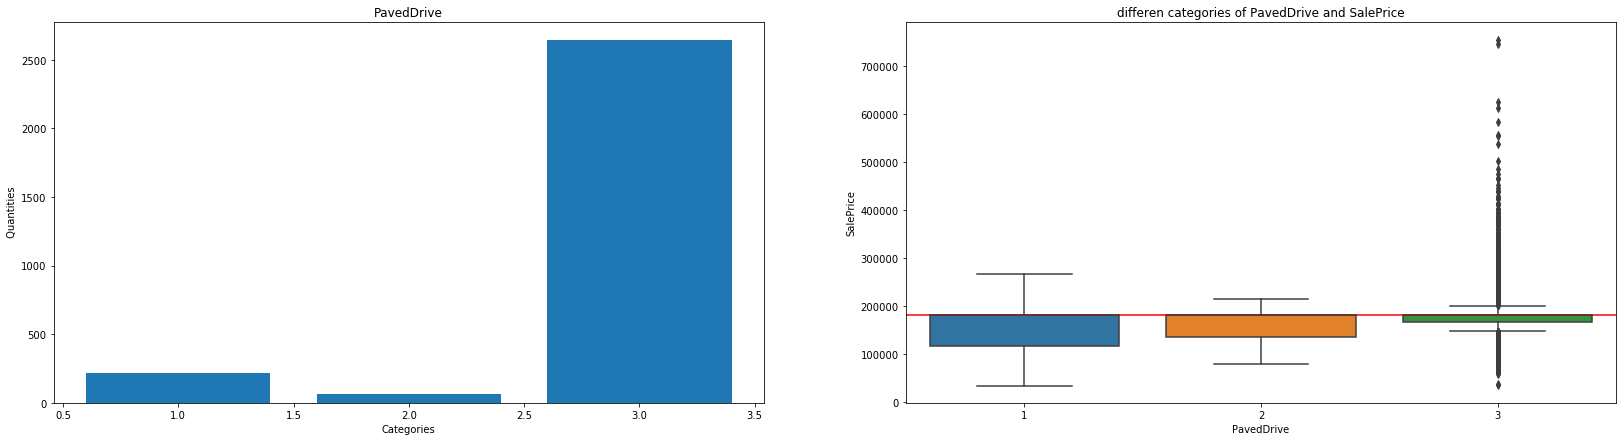

In [100]:
plot_fea(df,"PavedDrive",continuous=False)

**Correlation between SalePrice and BsmtCond**

Correlation amount with  SalePrice    0.110352
Name: BsmtCond, dtype: float64
Amount of Outlier:  11.797018285995215
Amount of Skewness:  -0.3365997116288818


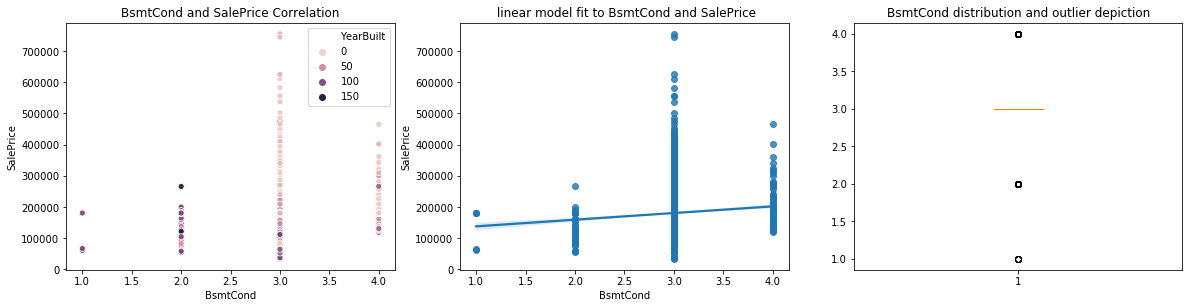

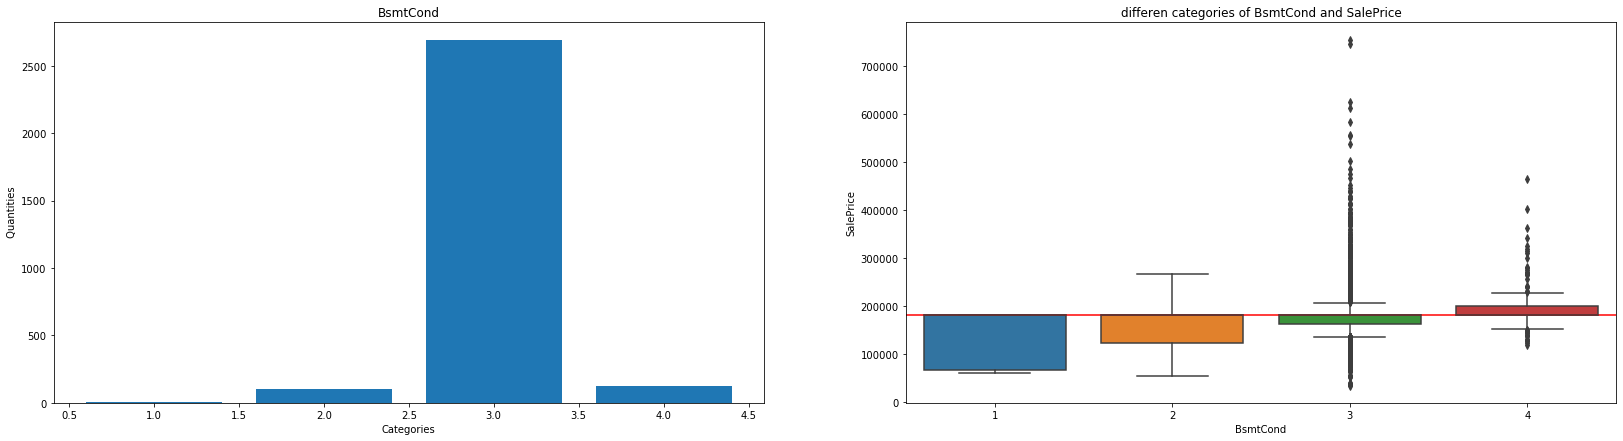

In [101]:
plot_fea(df,"BsmtCond",continuous=False)

**Handeling the categorical variables**

Most of the machine learning algorithms cannot handle the categorical variables, a way forward is to use some techniques like one hot encoding, labelencoding and getdummies to convert them to numerical variables.

In [102]:
df1=df.copy()
#df=pd.get_dummies(df)

le=preprocessing.LabelEncoder()

for i in (df.select_dtypes('O')):
    df[i]=le.fit_transform(df[i])

In [103]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,4,3,0,4,3,...,0,0,0,0,0,2,12,8,4,208500.0
1,20,3,80.0,9600,1,4,3,0,2,3,...,0,0,0,0,0,5,13,8,4,181500.0
2,60,3,68.0,11250,1,3,3,0,4,3,...,0,0,0,0,0,9,12,8,4,223500.0
3,70,3,60.0,9550,1,3,3,0,0,3,...,272,0,0,0,0,2,14,8,0,140000.0
4,60,3,84.0,14260,1,3,3,0,2,3,...,0,0,0,0,0,12,12,8,4,250000.0


**Removing Correlated features**

" Consider the following Equation: Y=B0 +B1X1+B2X2+B3X3+B4X4
and asume that X3 and X4 are highly correlated.

Now to estimate the β coefficient of each independent variable with respect to Y, we observe the change in the magnitude of Y variable when we slightly change the magnitude of any one independent variable at a time.

Case 1:
Considering the Variables X1 and X2, they are independent of every other variable. If we try to change the magnitude of the either X1 or X2 , they will not cause any other independent variable to change its value or by some negligible amount. As a result we can clearly observe the influence of independent Variable X over Y.

Case 2:
If we try to change the magnitude of X3 to observe the change in Y, there will also be a significant difference in the value of X4. As a result, the change that we observe in Y is due to the change in both X3 and X4. The resultant change is greater than the Actual change.

Here the problem is, as we are trying to estimate the Coefficient corresponding to X3, the contribution of variable X4 causes the coefficient to be overestimated. And because of this, the coefficients are overestimated. As a result, our interpretations can be misleading.

The best way to identify the multicollinearity is to calculate the Variance Inflation Factor (VIF) corresponding to every independent Variable in the Dataset.

VIF tells us about how well an independent variable is predictable using the other independent variables. Let’s understand this with the help of an example.

Consider that we have 9 independent variables, V1 to V9. To calculate the VIF of variable V1, we isolate the variable V1 and consider as the target variable and all the other variables will be treated as the predictor variables. X:V2 to V9
and y: V1.

We use all the other predictor variables and train a regression model and find out the corresponding R2 value. Using this R2 value, we compute the VIF value gives as the image below.

R2= 1-MSE(MODEL)/MSE(BaseLine), VIF= 1/(1-R2)

Looking at the formulation we can clearly see that as the R2 value increases, the VIF value also increases. A higher R2 value signifies that:
“the target independent variable is very well explained by the other independent variables”.

It is always desirable to have VIF value as small as possible, but it can lead to many significant independent variables to be removed from the dataset. Therefore a VIF = 5 is often taken as a threshold. Which means that any independent variable greater than 5 will have to be removed. Although the ideal threshold value depends upon the problem at hand."

Briefly:

When to variables X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.


**Interpreting the Variance Inflation Factor**

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.
Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern.


ref:[https://medium.com/analytics-vidhya/what-is-multicollinearity-and-how-to-remove-it-413c419de2f], [https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/]
[https://www.statisticshowto.com/variance-inflation-factor/#:~:text=Variance%20inflation%20factors%20range%20from,is%20inflated%20for%20each%20coefficient.]

In [104]:
# Calculating VIF of df
def cal_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.drop(['SalePrice'],axis=1)

vif =cal_vif(X)
vif

,variables,VIF
0,MSSubClass,13.476544
1,MSZoning,28.937796
2,LotFrontage,21.285619
3,LotArea,4.126489
4,Street,230.837687
...,...,...
70,MiscVal,1.072233
71,MoSold,6.595667
72,YrSold,88.336115
73,SaleType,25.389051


TO automatically removing highly correlated features we can use following function.

Based on the VIF, it detect and removes the highly correlated features.

In [105]:
def calculate_vif(X, thresh):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

X = df.drop(['SalePrice'],axis=1)
tr_=100
df=calculate_vif(X, tr_)

dropping 'BsmtFinSF1' at index: 32
dropping '1stFlrSF' at index: 40
dropping 'GarageCond' at index: 60
dropping 'Street' at index: 4
dropping 'LandSlope' at index: 8
dropping 'GarageQual' at index: 57
dropping 'Functional' at index: 49
dropping 'BsmtCond' at index: 27
dropping 'ExterQual' at index: 23
dropping 'GrLivArea' at index: 38
Remaining variables:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath

In [106]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,4,3,0,4,5,2,...,61,0,0,0,0,0,2,12,8,4
1,20,3,80.0,9600,4,3,0,2,24,1,...,0,0,0,0,0,0,5,13,8,4
2,60,3,68.0,11250,3,3,0,4,5,2,...,42,0,0,0,0,0,9,12,8,4
3,70,3,60.0,9550,3,3,0,0,6,2,...,35,272,0,0,0,0,2,14,8,0
4,60,3,84.0,14260,3,3,0,2,15,2,...,84,0,0,0,0,0,12,12,8,4


In [107]:
df["SalePrice"]=SalePrice

In [117]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2.664197,3,15.967598,0.122411,8.787626,3,0,4,5,2,...,-0.00000,-0.0,-0.0,-0.0,-0.0,2,12,8,4,1.368402e+44
1,2.192747,3,18.053783,0.122411,8.787626,3,0,2,24,1,...,-0.00000,-0.0,-0.0,-0.0,-0.0,5,13,8,4,4.226145e+43
2,2.664197,3,16.400996,0.122411,7.306778,3,0,4,5,2,...,-0.00000,-0.0,-0.0,-0.0,-0.0,9,12,8,4,2.465070e+44
3,2.722440,3,15.224624,0.122411,7.306778,3,0,0,6,2,...,0.76876,-0.0,-0.0,-0.0,-0.0,2,14,8,0,4.685209e+42
4,2.664197,3,18.579309,0.122411,7.306778,3,0,2,15,2,...,-0.00000,-0.0,-0.0,-0.0,-0.0,12,12,8,4,6.369461e+44


**Transforiming non normal features to normal features**

In [118]:
for i in (df.columns):
    if df[i].unique()[0]==0 and df[i].unique()[0]==1:
        df[i]=df[i].astype('uint8')

to_be_tranF=df.select_dtypes(['int64','float64']).columns


skewed_features = df[to_be_tranF].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   

# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} higest skewed numerical features to box cox transform".format(skewness.shape[0]))


for idx in skewness.index:
    df[idx], _ = scipy.stats.yeojohnson(df[idx])

skewed_features2 = df[skewness.index].apply(lambda x : skew (x.dropna()))

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))


There are 15 higest skewed numerical features to box cox transform


,Skew,New Skew
SalePrice,25.215116,NaN
PoolArea,14.884318,14.884318
3SsnPorch,8.712332,8.712332
LowQualFinSF,8.365937,8.365937
MiscVal,5.037498,5.037498
BsmtHalfBath,3.685627,3.681858
ScreenPorch,2.915215,2.915215
BsmtFinType2,2.360445,2.255855
BsmtFinSF2,2.350229,2.350167
EnclosedPorch,1.883152,1.883099


In [120]:
df['SalePrice']=SalePrice

In [122]:
df['LotShape']=np.log(df['LotShape'])

In [54]:
# we can also use power transformer

pt = PowerTransformer()
trans_df=pd.DataFrame(pt.fit_transform(df[to_be_tranF]), columns=to_be_tranF)

# Select those features we have not transformed 
temp=pd.DataFrame(df.select_dtypes('uint8'), index=df.index )

#reset Index
df.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)

#concat dataframes
df3=pd.concat([trans_df, temp], axis=1)
df3["SalePrice"]=SalePrice

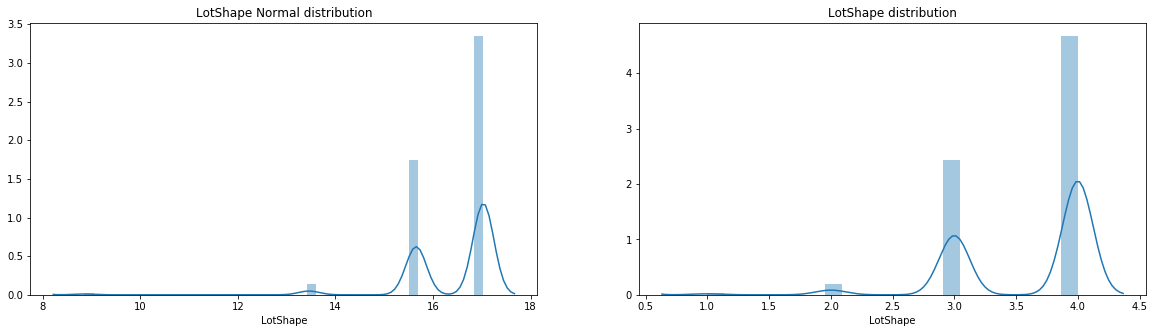

In [123]:
# Plotting the distribution of variables before and after normalization to compare their distribution

def compare_skewness(fea_, df, df1):
    fig=plt.figure(figsize=(20,5))
    fig1=fig.add_subplot(121)
    sns.distplot(df[fea_])
    fig1.set_title(fea_ + ' ' + 'Normal distribution')

    fig2=fig.add_subplot(122)
    sns.distplot(df1[fea_])
    fig2.set_title(fea_+ ' ' + 'distribution')
    
compare_skewness('LotShape', df, df1)

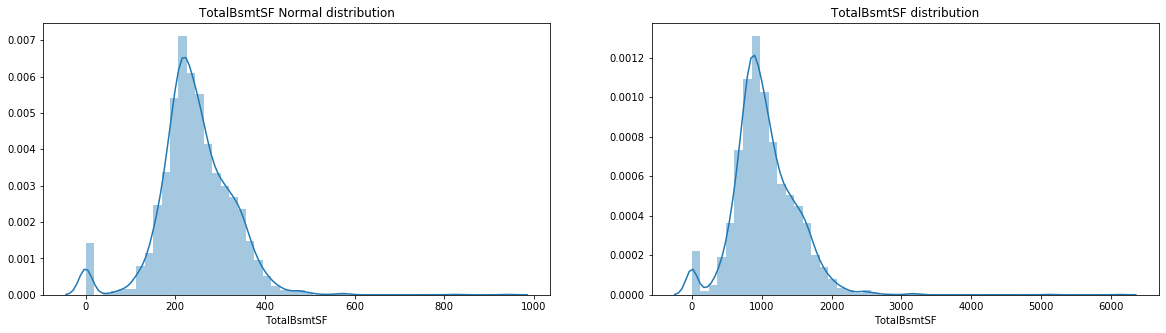

In [124]:
compare_skewness('TotalBsmtSF',df, df1)

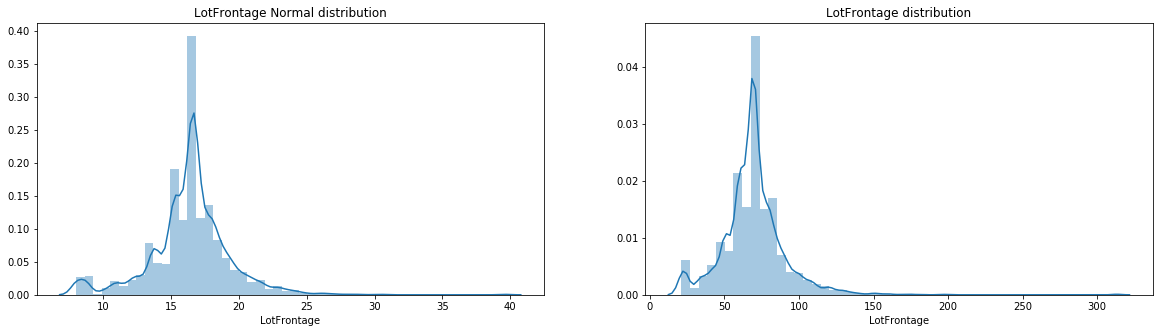

In [125]:
compare_skewness('LotFrontage',df, df1)

**Building the model**

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   float64
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   LotShape       2919 non-null   float64
 5   LandContour    2919 non-null   int32  
 6   Utilities      2919 non-null   int32  
 7   LotConfig      2919 non-null   int32  
 8   Neighborhood   2919 non-null   int32  
 9   Condition1     2919 non-null   int32  
 10  Condition2     2919 non-null   int32  
 11  BldgType       2919 non-null   int32  
 12  HouseStyle     2919 non-null   int32  
 13  OverallQual    2919 non-null   int64  
 14  OverallCond    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   int32  
 18  RoofMatl

In [127]:
# Spilitting the Testset and Trainingset
train_set=df[df.SalePrice>0]
test_set=df[df.SalePrice==0]

#reset Index
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

**Feature Selection**

I the previous steps we spend time to clen up data using different approches, and came up with a clean data. However all of the features we ended up with might not useful and contribute greatly to the our predictive model. 

In fact some them even can degrade the performance of the model. Feature selection refers to a process through which most relevant features to a predictive model are chosen. There are some benefits with feature selection, most important of them are:

1. It reduces the variance of the model, and therefore overfitting. As a results it improve regulization of the model.
2. It reduces the complexity of a model and makes it easier to interpret.
3. It improves the accuracy of a model if the right subset is chosen. 
4. It reduces the computational cost (and time) of training a model.
5. It reduces dimensionalty of the data, so the algorithm can run faster.


There are some differences between dimensionalty reduction process (using PCA and LDA and ...) with feature selection and feature extraction. 
Using feature selection, we select a subset of the original features. In feature extraction, we derive information from the feature set to construct a new feature subspace. But dimensionality reduction process, combines features by projecting them to a new axis which is the most discriminative one to reduce the dimensionality.

**1. RFE method for feature selection** 

In [129]:
# Scaling the features
SC=MinMaxScaler()
X=train_set.drop(["SalePrice"], axis=1)
S_X=pd.DataFrame(SC.fit_transform(X), columns=X.columns)
y=train_set["SalePrice"]

In [131]:
# Recursive Feature Elimination
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
features=X.columns

n_features_to_select = 8
rfe = RFE(regressor, n_features_to_select)
rfe.fit(S_X, y)
    
rfe_slct_fea=pd.DataFrame([(item, score) for item, score in (sorted(zip(rfe.ranking_ , features)))], columns=['score', 'feature'])
rfe_slct_fea.head(20)

,score,feature
0,1,2ndFlrSF
1,1,BsmtUnfSF
2,1,GarageArea
3,1,GarageCars
4,1,LotFrontage
5,1,OverallQual
6,1,TotRmsAbvGrd
7,1,TotalBsmtSF
8,2,FullBath
9,3,YearRemodAdd


In [132]:
rfe_slct_fea["feature"]

0        2ndFlrSF
1       BsmtUnfSF
2      GarageArea
3      GarageCars
4     LotFrontage
         ...     
60        Heating
61        MiscVal
62     Condition2
63      Utilities
64        LotArea
Name: feature, Length: 65, dtype: object

**2. Filter method**

Filter methods use statistical methods (Statistical hypothesis testing) for selecting the best subset of features. These methods are known as univariate feature selection, since they examines each feature individually to determine the strength of its correlation with target variable. Since these methods check the correlation of individual feature with target variable to find the strength of the correlation, they might not perform well for optimizing the feature set for better generalization.

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features

- SelectPercentile removes all but a user-specified highest scoring percentage of features

using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

In [133]:
s_kbest= SelectKBest(score_func=f_regression, k=50)
skb=s_kbest.fit(S_X, y)

features=S_X.columns

slct_feas_kbest= s_kbest.get_support()
kbest_FR = features[slct_feas_kbest]
scores= skb.scores_[slct_feas_kbest]
fea_scores= pd.DataFrame([(item, score) for item, score in zip(kbest_FR, scores)], columns=['feature', 'score'])
sk_best_slk_feas=fea_scores.sort_values(by='score',ascending=False)

print("Selected features by the model:")
print(" ")
print(sk_best_slk_feas)

Selected features by the model:
 
          feature        score
8     OverallQual  2436.770591
34    KitchenQual  1122.858910
18       BsmtQual  1067.460040
40     GarageCars  1013.705666
41     GarageArea   926.951287
23    TotalBsmtSF   832.119887
30       FullBath   668.430296
39   GarageFinish   591.563732
10      YearBuilt   548.665821
35   TotRmsAbvGrd   544.255041
11   YearRemodAdd   504.714855
36     Fireplaces   440.618540
38    GarageYrBlt   415.793392
44    OpenPorchSF   330.489185
25      HeatingQC   326.323107
16     MasVnrArea   263.089746
17     Foundation   249.840256
1     LotFrontage   194.673550
19   BsmtExposure   170.957532
43     WoodDeckSF   163.990438
37     GarageType   146.432920
20   BsmtFinType1   142.903231
31       HalfBath   128.018964
26     CentralAir    98.305344
2        LotShape    85.927656
27     Electrical    85.182314
42     PavedDrive    82.978468
29   BsmtFullBath    79.300912
12      RoofStyle    75.871600
49  SaleCondition    69.354436
4    

**Model Selection**


In [137]:
# Models

linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
kr = KernelRidge()
elnt = ElasticNet()
dt = DecisionTreeRegressor()
svm = SVR()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()

selected_features_skb=sk_best_slk_feas["feature"]
selected_features_rfe=rfe_slct_fea["feature"]

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, knn, rf, et, ab, gb]
models_name=['LinearRegression', 'Lasso', 'Ridge','KernelRidge' ,'ElasticNet', 'DecisionTreeRegressor', 'KNeighborsRegressor'
             'RandomForestRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor']
     

# scoring = {'MEA': 'neg_mean_absolute_error', 'R2': 'r2', 'RMSE': 'neg_mean_squared_error'}
scoring=['explained_variance','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
scoring_names=['explained_variance','R2_score','RMSE', 'MEA']

# Outlier Detection and Removal 

outlier_removal_model=OneClassSVM()
yhat=outlier_removal_model.fit_predict(S_X[selected_features_skb])
mask=yhat!=-1
masked_X_train, masked_y= S_X[mask], y[mask]


def cross_validate1(model, scoring):
    
    score= cross_validate(model, masked_X_train, masked_y, cv=5, return_train_score=True, n_jobs = -1, scoring = scoring)
    return score

'''Calculate cross validation score of differnt models and plot them.'''

cross_val_scores = []

result=pd.DataFrame(index=models_name, columns=scoring_names)
for model in range(len(models)):
    cross_val_result=cross_validate1(models[model], scoring)
    result.loc[models_name[model]]['explained_variance']=cross_val_result['test_explained_variance'].mean()
    result.loc[models_name[model]]['R2_score']=cross_val_result['test_r2'].mean()
    result.loc[models_name[model]]['RMSE']=np.round(-1*cross_val_result['test_neg_root_mean_squared_error'].mean(), 5)
    result.loc[models_name[model]]['MEA']=np.round(-1*cross_val_result['test_neg_mean_absolute_error'].mean(), 5)

display(result)
    
# Plotting scores
    
def plot_scores(d_x, d_y, title, x_axis, y_axis, size, c_scale):
    trace = go.Scatter(
    x = d_x,
    y = d_y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = x_axis), yaxis = dict(title = y_axis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

train_test_score = pd.DataFrame(data = result, columns = ['R2_score'])
train_test_score.index = ['lasso', 'ridge', 'kr', 'elnt', 'dt', 'knn', 'rf', 'et', 'ab', 'gb']
train_test_score = train_test_score.round(5)
d_x = train_test_score.index
d_y = train_test_score['R2_score']
title = "Models' skills Score (r2) "
plot_scores(d_x, d_y, title, 'Models','metric: r2', 10, 'Rainbow')

,explained_variance,R2_score,RMSE,MEA
LinearRegression,0.835587,0.834372,22437.6,16672.4
Lasso,0.833477,0.832471,22562.4,16576.3
Ridge,0.833425,0.83245,22562.9,16562.4
KernelRidge,0.489212,0.486311,39548.1,29129.9
ElasticNet,0.668713,0.667546,31556.4,23002.7
DecisionTreeRegressor,0.704214,0.698591,30276.1,21933.6
KNeighborsRegressorRandomForestRegressor,0.836136,0.835825,22326.2,15250.6
ExtraTreesRegressor,0.827334,0.825741,22950.9,16020.1
AdaBoostRegressor,0.796375,0.795194,24941.7,17729.9
GradientBoostingRegressor,0.8595,0.858509,20725.4,14475.7


From the above table we can see that Gradiantboostingregressor has the highest performance

**Deep Learnin Algorithms**
Lets try deep learnin to how they can deel with this data. It is probable that they can not beat the ML algorithms, sizce they need larger data. However for the sake of curiosity lets go for deep learning :), my favorite algorithms. For deeplearning we have variety of option, but here we will use:

1. Keras
2. Pytorch

Different layers with dropout are considered to have enough complexity and ofcourse avoid overfitting.

**keras**

In [148]:
X_train, X_val, y_train, y_val = train_test_split(S_X, y, test_size=0.3)
NCOLS=kX_tr.shape[1]
features= X_tr  
n_cols = features.shape[1]


model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae']) 
early_stopping_monitor =EarlyStopping(patience=10)

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               13200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [149]:
history=model.fit(features, y_tr, validation_data=(kX_val,ky_val), epochs=500, batch_size=32)

Train on 1022 samples, validate on 438 samples
Epoch 1/500
1022/1022 [==============================] - 0s 206us/step - loss: 39801661027.1937 - mae: 182320.2500 - val_loss: 37580765342.9772 - val_mae: 179325.2812
Epoch 2/500
1022/1022 [==============================] - 0s 75us/step - loss: 39713458893.4012 - mae: 182089.1406 - val_loss: 37337083342.9041 - val_mae: 178661.9219
Epoch 3/500
1022/1022 [==============================] - 0s 55us/step - loss: 38953114942.6223 - mae: 180040.2969 - val_loss: 35695276574.3927 - val_mae: 174133.7188
Epoch 4/500
1022/1022 [==============================] - 0s 70us/step - loss: 35363598075.4912 - mae: 170117.2969 - val_loss: 29761580270.4658 - val_mae: 156712.6094
Epoch 5/500
1022/1022 [==============================] - 0s 56us/step - loss: 26171197558.2309 - mae: 141072.5312 - val_loss: 17422697972.3105 - val_mae: 112383.9531
Epoch 6/500
1022/1022 [==============================] - 0s 71us/step - loss: 12781002764.0235 - mae: 84838.1719 - val_los

Epoch 51/500
1022/1022 [==============================] - 0s 74us/step - loss: 3095022252.3366 - mae: 37306.8594 - val_loss: 1553319532.7123 - val_mae: 27429.3652
Epoch 52/500
1022/1022 [==============================] - 0s 73us/step - loss: 3049152946.3483 - mae: 37818.3789 - val_loss: 1570025370.3014 - val_mae: 26847.9238
Epoch 53/500
1022/1022 [==============================] - 0s 68us/step - loss: 3272118261.9804 - mae: 38906.0352 - val_loss: 1531700553.6438 - val_mae: 26994.2676
Epoch 54/500
1022/1022 [==============================] - 0s 64us/step - loss: 2738100024.3601 - mae: 36254.2227 - val_loss: 1538332598.3562 - val_mae: 26701.5703
Epoch 55/500
1022/1022 [==============================] - 0s 65us/step - loss: 3056492545.0020 - mae: 37851.5898 - val_loss: 1513610829.1507 - val_mae: 26846.5527
Epoch 56/500
1022/1022 [==============================] - 0s 65us/step - loss: 3147444865.5029 - mae: 38630.7617 - val_loss: 1507085054.8311 - val_mae: 26621.8359
Epoch 57/500
1022/1022

1022/1022 [==============================] - 0s 61us/step - loss: 2649190206.3718 - mae: 36350.5156 - val_loss: 1293989810.8493 - val_mae: 23922.4082
Epoch 102/500
1022/1022 [==============================] - 0s 66us/step - loss: 2712495826.9119 - mae: 35835.8203 - val_loss: 1298090227.1416 - val_mae: 23944.3242
Epoch 103/500
1022/1022 [==============================] - 0s 68us/step - loss: 2844482775.4207 - mae: 36177.8555 - val_loss: 1395989790.3927 - val_mae: 24883.1660
Epoch 104/500
1022/1022 [==============================] - 0s 71us/step - loss: 2579751287.2329 - mae: 35709.7188 - val_loss: 1268928452.3836 - val_mae: 23820.1621
Epoch 105/500
1022/1022 [==============================] - 0s 62us/step - loss: 2812323382.1057 - mae: 36809.5508 - val_loss: 1323840356.5297 - val_mae: 24130.3652
Epoch 106/500
1022/1022 [==============================] - 0s 53us/step - loss: 2776535872.1252 - mae: 36108.2500 - val_loss: 1281074184.1826 - val_mae: 23762.3223
Epoch 107/500
1022/1022 [=====

1022/1022 [==============================] - 0s 65us/step - loss: 2239491600.5323 - mae: 33597.8203 - val_loss: 1196276021.1872 - val_mae: 22610.3652
Epoch 152/500
1022/1022 [==============================] - 0s 58us/step - loss: 2284881496.1722 - mae: 33822.8164 - val_loss: 1197079112.4749 - val_mae: 22547.1230
Epoch 153/500
1022/1022 [==============================] - 0s 59us/step - loss: 2536204042.5205 - mae: 35439.6523 - val_loss: 1229476525.5890 - val_mae: 22855.8145
Epoch 154/500
1022/1022 [==============================] - 0s 62us/step - loss: 2347228036.0078 - mae: 34821.0938 - val_loss: 1231067619.9452 - val_mae: 22810.4297
Epoch 155/500
1022/1022 [==============================] - 0s 74us/step - loss: 2495684360.5166 - mae: 35352.9180 - val_loss: 1189750565.9909 - val_mae: 22439.8086
Epoch 156/500
1022/1022 [==============================] - 0s 66us/step - loss: 2637607768.1722 - mae: 35652.4688 - val_loss: 1209521652.8950 - val_mae: 22633.1523
Epoch 157/500
1022/1022 [=====

1022/1022 [==============================] - 0s 63us/step - loss: 2606990499.3190 - mae: 34177.7148 - val_loss: 1167731143.8904 - val_mae: 21798.9082
Epoch 202/500
1022/1022 [==============================] - 0s 70us/step - loss: 2563160251.3659 - mae: 35211.9180 - val_loss: 1204102644.8950 - val_mae: 22301.1797
Epoch 203/500
1022/1022 [==============================] - 0s 77us/step - loss: 2349687022.9667 - mae: 34211.1641 - val_loss: 1188082772.7489 - val_mae: 22080.3496
Epoch 204/500
1022/1022 [==============================] - 0s 67us/step - loss: 2307888168.0783 - mae: 34104.5039 - val_loss: 1175845013.6256 - val_mae: 21920.8457
Epoch 205/500
1022/1022 [==============================] - 0s 67us/step - loss: 2603276648.7045 - mae: 34485.5781 - val_loss: 1184206156.5662 - val_mae: 22012.8398
Epoch 206/500
1022/1022 [==============================] - 0s 68us/step - loss: 2640617788.6184 - mae: 36114.3203 - val_loss: 1191126242.1918 - val_mae: 22097.9707
Epoch 207/500
1022/1022 [=====

1022/1022 [==============================] - 0s 60us/step - loss: 2213868559.7808 - mae: 32330.1836 - val_loss: 1139404949.6256 - val_mae: 21252.6074
Epoch 252/500
1022/1022 [==============================] - 0s 63us/step - loss: 2184844541.4951 - mae: 32825.2500 - val_loss: 1137597286.8676 - val_mae: 21228.1582
Epoch 253/500
1022/1022 [==============================] - 0s 65us/step - loss: 2450147284.4149 - mae: 35195.6641 - val_loss: 1157990828.4201 - val_mae: 21525.9707
Epoch 254/500
1022/1022 [==============================] - 0s 55us/step - loss: 2345576813.7143 - mae: 34051.5312 - val_loss: 1238537169.8265 - val_mae: 22747.3340
Epoch 255/500
1022/1022 [==============================] - 0s 60us/step - loss: 2529775146.5832 - mae: 34051.3711 - val_loss: 1151514077.5160 - val_mae: 21387.5762
Epoch 256/500
1022/1022 [==============================] - 0s 61us/step - loss: 2045991209.0802 - mae: 31567.1934 - val_loss: 1188170424.1096 - val_mae: 21958.0762
Epoch 257/500
1022/1022 [=====

1022/1022 [==============================] - 0s 68us/step - loss: 2147501317.5108 - mae: 33381.6445 - val_loss: 1130371540.1644 - val_mae: 21010.6895
Epoch 302/500
1022/1022 [==============================] - 0s 59us/step - loss: 2233035795.5382 - mae: 33702.9727 - val_loss: 1112648927.8539 - val_mae: 20636.1504
Epoch 303/500
1022/1022 [==============================] - 0s 70us/step - loss: 2124849001.2055 - mae: 32391.9688 - val_loss: 1134959753.3516 - val_mae: 21056.0859
Epoch 304/500
1022/1022 [==============================] - 0s 63us/step - loss: 2300073785.1115 - mae: 33133.2695 - val_loss: 1119979760.2192 - val_mae: 20755.4648
Epoch 305/500
1022/1022 [==============================] - 0s 59us/step - loss: 2444252715.5851 - mae: 34020.4062 - val_loss: 1136302880.1461 - val_mae: 21084.5840
Epoch 306/500
1022/1022 [==============================] - 0s 59us/step - loss: 2157182763.3346 - mae: 32471.3828 - val_loss: 1110265238.7945 - val_mae: 20630.0703
Epoch 307/500
1022/1022 [=====

1022/1022 [==============================] - 0s 63us/step - loss: 2407218039.2329 - mae: 33823.5586 - val_loss: 1085946524.6393 - val_mae: 20136.8457
Epoch 352/500
1022/1022 [==============================] - 0s 62us/step - loss: 2417286503.9530 - mae: 34244.4492 - val_loss: 1107425770.3744 - val_mae: 20524.3516
Epoch 353/500
1022/1022 [==============================] - 0s 59us/step - loss: 2304029620.6027 - mae: 33340.2227 - val_loss: 1106279734.3562 - val_mae: 20509.9453
Epoch 354/500
1022/1022 [==============================] - 0s 58us/step - loss: 2513512029.4325 - mae: 34085.3516 - val_loss: 1088802993.6804 - val_mae: 20196.5117
Epoch 355/500
1022/1022 [==============================] - 0s 58us/step - loss: 2269625464.7358 - mae: 33175.4219 - val_loss: 1104884543.7078 - val_mae: 20502.0488
Epoch 356/500
1022/1022 [==============================] - 0s 62us/step - loss: 2100127410.5988 - mae: 32649.6367 - val_loss: 1108471885.7352 - val_mae: 20536.8398
Epoch 357/500
1022/1022 [=====

1022/1022 [==============================] - 0s 66us/step - loss: 2470504061.2446 - mae: 33553.3242 - val_loss: 1102417751.6712 - val_mae: 20410.0859
Epoch 402/500
1022/1022 [==============================] - 0s 66us/step - loss: 2274774937.8004 - mae: 32471.3809 - val_loss: 1064974250.0822 - val_mae: 19751.4160
Epoch 403/500
1022/1022 [==============================] - 0s 68us/step - loss: 2124771369.0802 - mae: 32892.3125 - val_loss: 1135968337.2420 - val_mae: 21012.4902
Epoch 404/500
1022/1022 [==============================] - 0s 58us/step - loss: 2266231143.4521 - mae: 33315.6133 - val_loss: 1084896336.0731 - val_mae: 20096.9316
Epoch 405/500
1022/1022 [==============================] - 0s 57us/step - loss: 2231489439.3112 - mae: 33138.2422 - val_loss: 1070433243.7626 - val_mae: 19800.5703
Epoch 406/500
1022/1022 [==============================] - 0s 64us/step - loss: 2590376981.0411 - mae: 34885.4336 - val_loss: 1081313560.5479 - val_mae: 19987.1523
Epoch 407/500
1022/1022 [=====

1022/1022 [==============================] - 0s 68us/step - loss: 2039927900.6810 - mae: 31794.3145 - val_loss: 1092058654.3927 - val_mae: 20097.6309
Epoch 452/500
1022/1022 [==============================] - 0s 61us/step - loss: 2161084507.9296 - mae: 32728.6738 - val_loss: 1064030862.6119 - val_mae: 19550.0859
Epoch 453/500
1022/1022 [==============================] - 0s 60us/step - loss: 2081112247.8591 - mae: 31539.0508 - val_loss: 1094179887.3425 - val_mae: 20136.9238
Epoch 454/500
1022/1022 [==============================] - 0s 59us/step - loss: 2116570162.7241 - mae: 33635.3359 - val_loss: 1091235287.6712 - val_mae: 20008.8359
Epoch 455/500
1022/1022 [==============================] - 0s 57us/step - loss: 2052186418.8493 - mae: 31173.2402 - val_loss: 1088285791.2694 - val_mae: 19969.9375
Epoch 456/500
1022/1022 [==============================] - 0s 67us/step - loss: 2085930809.1115 - mae: 32000.9785 - val_loss: 1108766019.2146 - val_mae: 20408.6074
Epoch 457/500
1022/1022 [=====

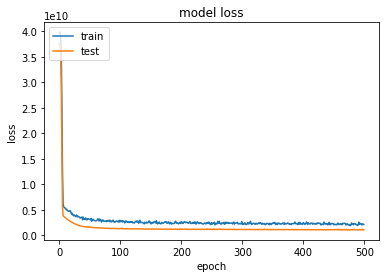

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pythorch**

In [141]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(65, 55)
        self.fc2 = nn.Linear(55, 50)
        self.fc3 = nn.Linear(50, 40)
        self.fc4 = nn.Linear(40, 25)
        self.fc5 = nn.Linear(25, 1)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))

        return x

In [142]:
X_tr, X_val, y_tr, y_val = train_test_split(S_X, y, test_size=0.3)
train_batch = np.array_split(X_tr, 50)
label_batch = np.array_split(y_tr, 50)

for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)

X_val = torch.from_numpy(X_val.values).float()
y_val = torch.from_numpy(y_val.values).float().view(-1, 1)

In [143]:
model = Regressor()
ps = model(train_batch[0])
ps.shape

torch.Size([21, 1])

In [146]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
iter=0
epochs = 200
test_loss = 10
train_losses, test_losses = [], []

for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(torch.log(output), torch.log(label_batch[i])))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        iter+=1 
        if iter%100==0:
            accuracy = 0  
            model.eval()
            predictions = model(X_val)
            test_loss=torch.sqrt(criterion(torch.log(predictions), torch.log(y_val)))
            
        train_losses.append(train_loss/len(train_batch))
        test_losses.append(test_loss)
        

   
   
    print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
              "Test Loss: {:.3f}.. ".format(test_loss))
            

            
            

Epoch: 0/200..  Training Loss: 11.958..  Test Loss: 10.000.. 
Epoch: 1/200..  Training Loss: 8.539..  Test Loss: 7.396.. 
Epoch: 2/200..  Training Loss: 6.651..  Test Loss: 7.396.. 
Epoch: 3/200..  Training Loss: 5.461..  Test Loss: 4.968.. 
Epoch: 4/200..  Training Loss: 4.576..  Test Loss: 4.968.. 
Epoch: 5/200..  Training Loss: 3.831..  Test Loss: 3.480.. 
Epoch: 6/200..  Training Loss: 3.202..  Test Loss: 3.480.. 
Epoch: 7/200..  Training Loss: 2.670..  Test Loss: 2.412.. 
Epoch: 8/200..  Training Loss: 2.193..  Test Loss: 2.412.. 
Epoch: 9/200..  Training Loss: 1.725..  Test Loss: 1.492.. 
Epoch: 10/200..  Training Loss: 1.312..  Test Loss: 1.492.. 
Epoch: 11/200..  Training Loss: 0.963..  Test Loss: 0.796.. 
Epoch: 12/200..  Training Loss: 0.677..  Test Loss: 0.796.. 
Epoch: 13/200..  Training Loss: 0.466..  Test Loss: 0.385.. 
Epoch: 14/200..  Training Loss: 0.355..  Test Loss: 0.385.. 
Epoch: 15/200..  Training Loss: 0.323..  Test Loss: 0.314.. 
Epoch: 16/200..  Training Loss: 

Epoch: 134/200..  Training Loss: 0.152..  Test Loss: 0.156.. 
Epoch: 135/200..  Training Loss: 0.152..  Test Loss: 0.155.. 
Epoch: 136/200..  Training Loss: 0.152..  Test Loss: 0.155.. 
Epoch: 137/200..  Training Loss: 0.151..  Test Loss: 0.155.. 
Epoch: 138/200..  Training Loss: 0.151..  Test Loss: 0.155.. 
Epoch: 139/200..  Training Loss: 0.151..  Test Loss: 0.154.. 
Epoch: 140/200..  Training Loss: 0.151..  Test Loss: 0.154.. 
Epoch: 141/200..  Training Loss: 0.150..  Test Loss: 0.153.. 
Epoch: 142/200..  Training Loss: 0.150..  Test Loss: 0.153.. 
Epoch: 143/200..  Training Loss: 0.150..  Test Loss: 0.153.. 
Epoch: 144/200..  Training Loss: 0.150..  Test Loss: 0.153.. 
Epoch: 145/200..  Training Loss: 0.149..  Test Loss: 0.152.. 
Epoch: 146/200..  Training Loss: 0.149..  Test Loss: 0.152.. 
Epoch: 147/200..  Training Loss: 0.149..  Test Loss: 0.152.. 
Epoch: 148/200..  Training Loss: 0.149..  Test Loss: 0.152.. 
Epoch: 149/200..  Training Loss: 0.148..  Test Loss: 0.151.. 
Epoch: 1

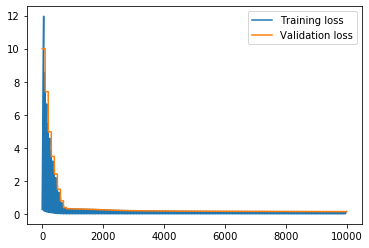

In [147]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=True)